In [1]:
import pandas as pd



In [2]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons_disease_data.csv to parkinsons_disease_data.csv


In [3]:
data=pd.read_csv('parkinsons_disease_data.csv')

In [4]:
data.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

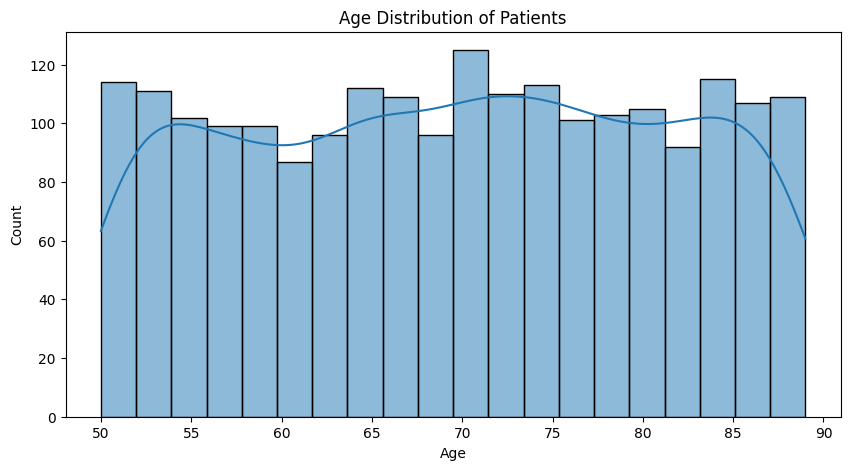

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

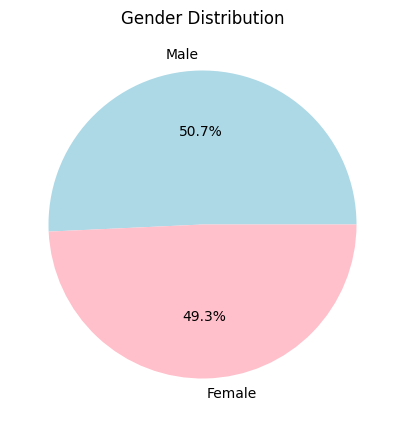

In [26]:
gender_counts = data['Gender'].value_counts()
labels = ["Male", "Female"]

plt.figure(figsize=(10,5))
plt.pie(gender_counts, labels=labels, autopct="%1.1f%%", colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

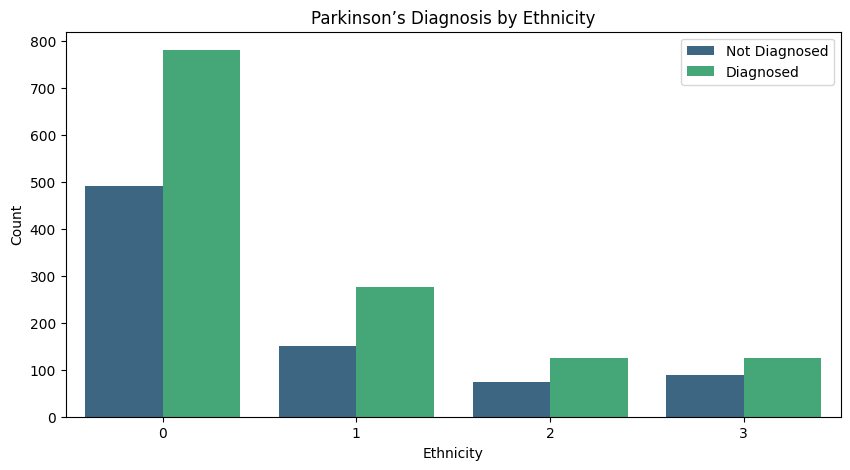

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Ethnicity', hue='Diagnosis', palette="viridis")
plt.title('Parkinson’s Diagnosis by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.legend(["Not Diagnosed", "Diagnosed"])
plt.show()

#Impact of Lifestyle Factors

<ipython-input-28-d74d45b92128>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Diagnosis', y='BMI',palette="coolwarm")


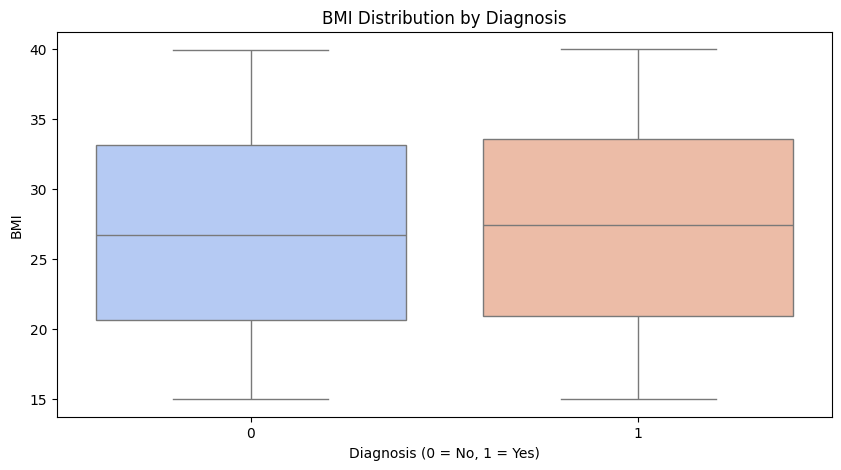

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Diagnosis', y='BMI',palette="coolwarm")
plt.title('BMI Distribution by Diagnosis')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

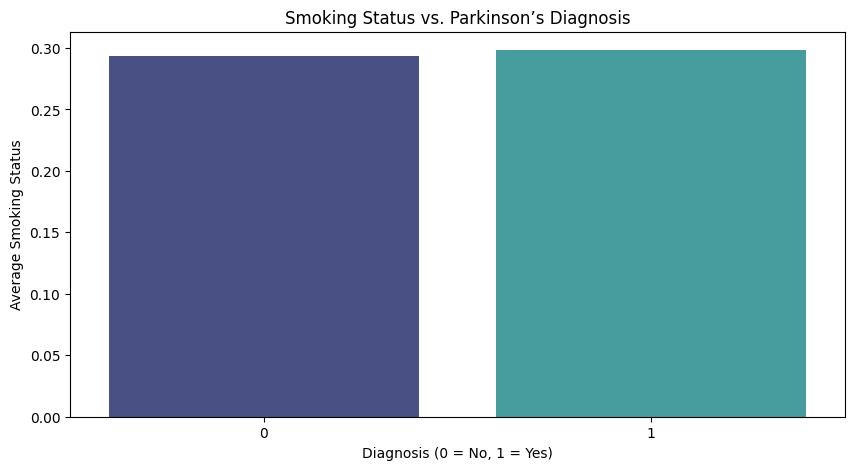

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=data, x='Diagnosis', y='Smoking', errorbar=None, hue="Diagnosis"
,palette="mako",legend=False)
plt.title('Smoking Status vs. Parkinson’s Diagnosis')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Average Smoking Status')
plt.show()

# Smoking & Alcohol Consumption Impact

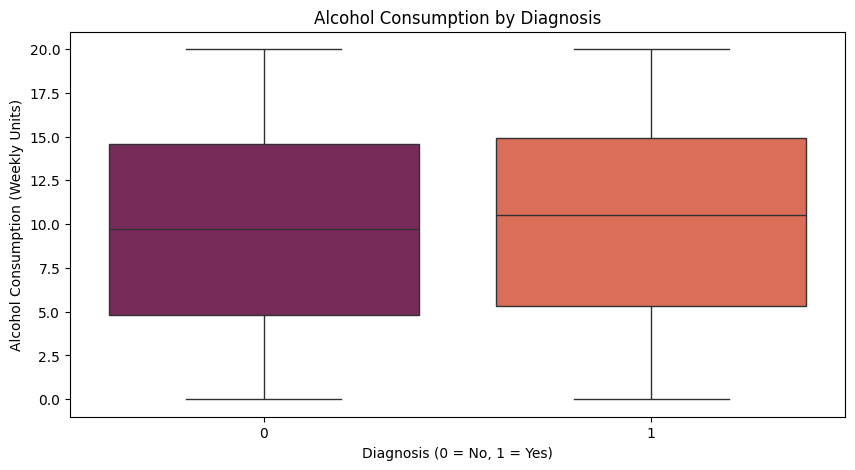

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='Diagnosis', y='AlcoholConsumption', palette="rocket",hue="Diagnosis",legend=False)
plt.title('Alcohol Consumption by Diagnosis')
plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
plt.ylabel('Alcohol Consumption (Weekly Units)')
plt.show()

#**Statistical** **& Correlation Analysis** **bold text**

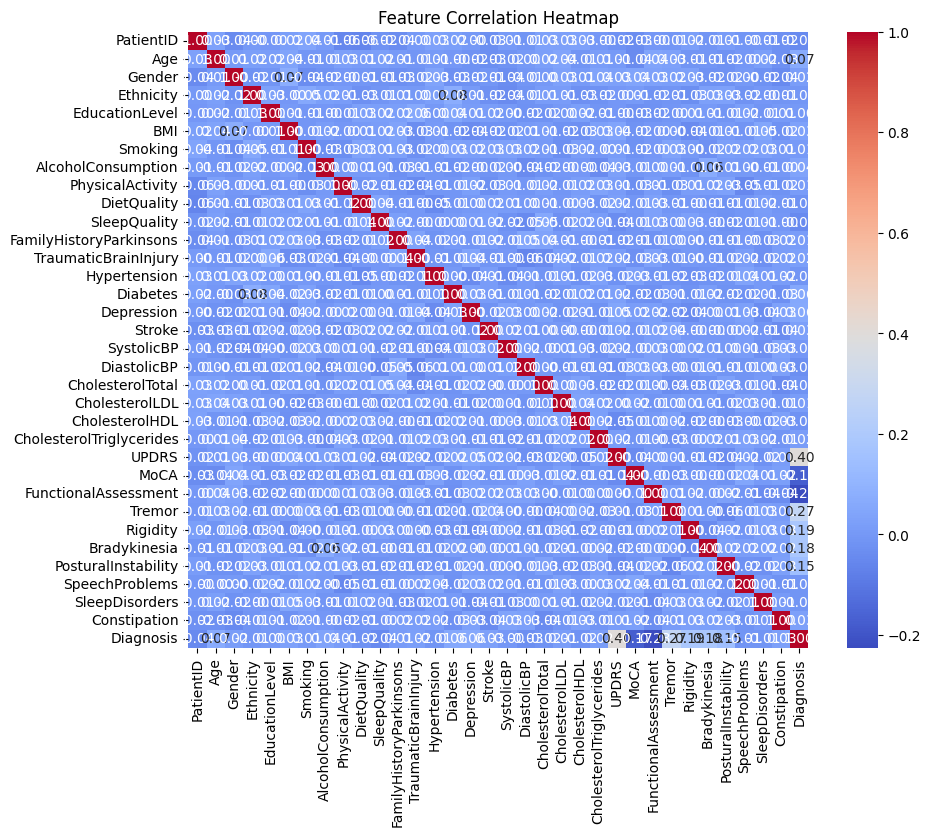

In [12]:
data_num=data.select_dtypes(include=["number"])
plt.figure(figsize=(10,8))
sns.heatmap(data_num.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# T-test (Comparison of Diagnosed vs. Non-Diagnosed)

In [13]:
from scipy.stats import ttest_ind,f_oneway

diagnosed = data[data['Diagnosis'] == 1]['Age']
non_diagnosed = data[data['Diagnosis'] == 0]['Age']
t_stat, p_val = ttest_ind(diagnosed, non_diagnosed)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 3.0029903569380085, P-value: 0.0027049233136815032


#  Lifestyle Factors

In [14]:
t_stat, p_val = ttest_ind(data[data['Diagnosis'] == 1]['PhysicalActivity'],
                          data[data['Diagnosis'] == 0]['PhysicalActivity'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 0.5934728808319427, P-value: 0.5529285487665315


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



In [16]:
original_data=data.copy()
categorical_col= data.copy()
categorical_col.drop(["PatientID","Diagnosis","DoctorInCharge"],axis=1,inplace=True)
categorical_col.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,6.458713,29.181289,1.572427,1,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,37.306703,12.332639,4.787551,0,1,0,1,0,1,0
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,67.838170,29.927783,2.130686,1,0,0,0,1,0,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,52.964696,21.304268,3.391288,1,1,1,0,0,0,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,21.804880,8.336364,3.200969,0,0,0,1,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
x=categorical_col.copy()
y=data["Diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
model=DecisionTreeClassifier(random_state=42,class_weight="balanced")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [19]:
print("\nClassification Report:")

print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.93      0.87      0.90       271

    accuracy                           0.87       421
   macro avg       0.86      0.88      0.87       421
weighted avg       0.88      0.87      0.88       421

Accuracy Score: 0.8741092636579573


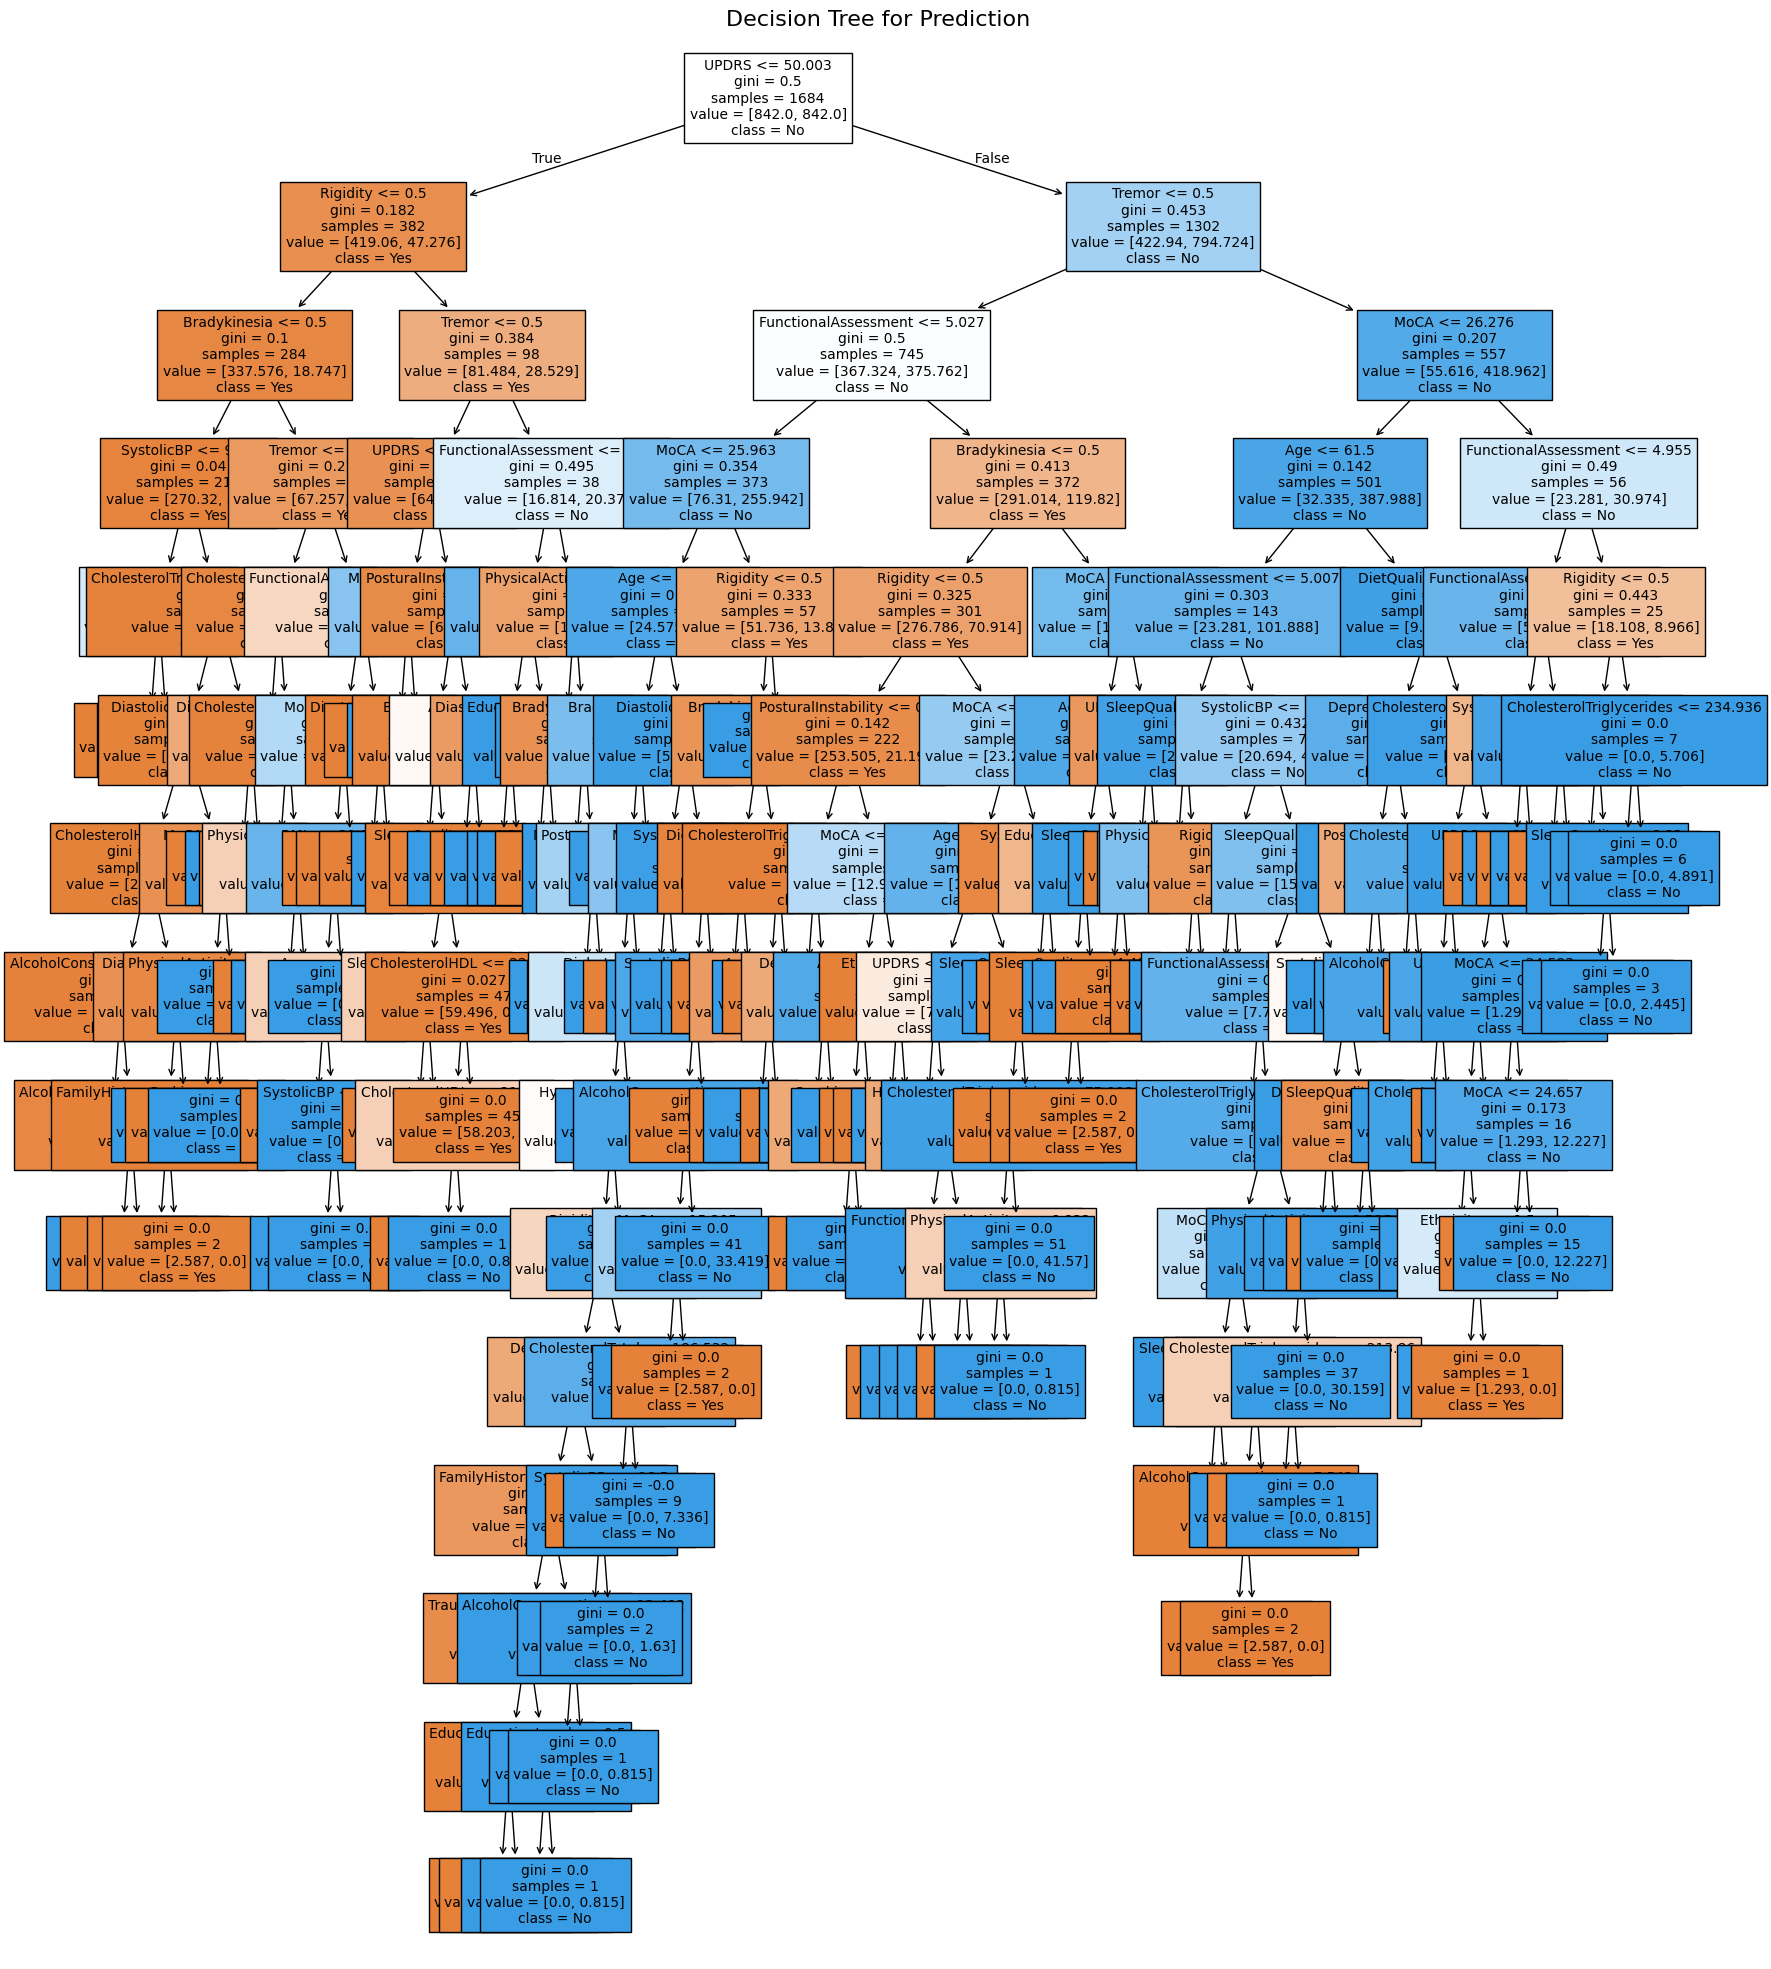

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,25))
plot_tree(model, filled=True, feature_names=x.columns,class_names=["Yes","No"],fontsize=10)
plt.title("Decision Tree for Prediction", fontsize=16)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model=RandomForestClassifier(n_estimators=1000,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [22]:
y_pred=rf_model.predict(x_test)

In [23]:
print("\nClassification Report:",classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:               precision    recall  f1-score   support

           0       0.84      0.92      0.88       150
           1       0.95      0.90      0.93       271

    accuracy                           0.91       421
   macro avg       0.89      0.91      0.90       421
weighted avg       0.91      0.91      0.91       421

Accuracy Score: 0.9073634204275535


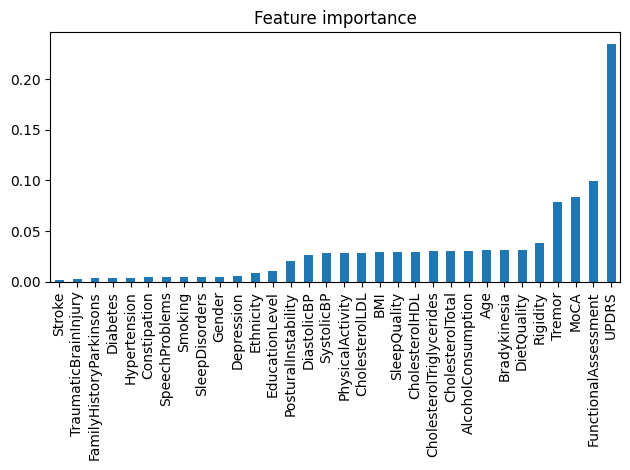

In [24]:
feature_importance=pd.Series(rf_model.feature_importances_,index=x.columns)
feature_importance.sort_values(ascending=True).plot(kind="bar",title="Feature importance")
plt.tight_layout()
plt.show()